In [34]:
%run setup

In [141]:
df_1.head()

Plan_Type_Usage,days,1,2,3
0,-183,25728,21068,17577
1,-182,20196,18753,12929
2,-181,14717,16018,10979
3,-180,10916,12362,35609
4,-179,18803,23910,28347


In [125]:
df_1.columns[-3:]

Index([1, 2, 3], dtype='object', name='Plan_Type_Usage')

In [116]:
df_1 = df_1.drop(df_1.index)

Plan_Type_Usage,days,1,2,3
363,180,18448,15220,18113
364,181,14225,23787,19490
365,182,25433,20607,19935


In [177]:
df_1.columns[-3:]

Index([1, 2, 3], dtype='object', name='Plan_Type_Usage')

In [185]:
df_1

Plan_Type_Usage,days,1,2,3
0,-183,25728,21068,17577
1,-182,20196,18753,12929
2,-181,14717,16018,10979
3,-180,10916,12362,35609
4,-179,18803,23910,28347
...,...,...,...,...
361,178,9369,16373,19065
362,179,18231,8436,19176
363,180,18448,15220,18113
364,181,14225,23787,19490


In [196]:
df_1 = df_1.iloc[:,-3:].rename(columns=lambda x:'plan '+str(x))

SyntaxError: invalid syntax (<ipython-input-196-19cd9a0b76bf>, line 1)

In [199]:
df_1.iloc[:,-3:] = df_1.iloc[:,-3:].rename(mapper=lambda x:'plan '+str(x), axis=1)

In [200]:
df_1

Plan_Type_Usage,plan plan 1,plan plan 2,plan plan 3
0,25728,21068,17577
1,20196,18753,12929
2,14717,16018,10979
3,10916,12362,35609
4,18803,23910,28347
...,...,...,...
361,9369,16373,19065
362,18231,8436,19176
363,18448,15220,18113
364,14225,23787,19490


In [201]:
df_1.head()

Plan_Type_Usage,plan plan 1,plan plan 2,plan plan 3
0,25728,21068,17577
1,20196,18753,12929
2,14717,16018,10979
3,10916,12362,35609
4,18803,23910,28347


In [202]:
arrays = [np.random.randn(3, 4) for _ in range(10)]
a = np.array([1, 2, 3])
b = np.array([2, 3, 4])

In [203]:
[np.stack]

[<function numpy.stack(arrays, axis=0, out=None)>]

In [204]:
np.stack((a,b),axis=1)

array([[1, 2],
       [2, 3],
       [3, 4]])

In [132]:
np.stack((df['Plan_Type_Usage'],))


,Sign_Up_Date,User_ID,Transactions,Expenses,Sales,Cash Flow,Payroll,Time,Reports,Taxes,...,Taxes_Usage,Mileage_Usage,Accounting_Usage,My_Accountant_Usage,Apps_Usage,Live_Bookkeeping_Usage,Plan_Type_Usage,Session_Length,Susbcribed,days
0,11/26/19,5307,0,0,0,0,0,0,1,0,...,3584,993,1336,1340,1977,1849,2,1207,0,-5
1,10/21/19,7364,1,0,1,0,0,0,0,0,...,1285,963,1155,703,1891,71,3,6368,0,-41
2,11/26/19,9166,0,1,0,1,0,1,0,1,...,1530,1909,2085,1721,1701,933,1,5482,1,-5
3,6/5/19,841,0,0,1,0,1,1,0,1,...,703,676,1113,1115,1252,442,3,2575,0,-179
4,5/24/20,5909,0,1,1,1,0,1,1,1,...,3670,1863,2045,743,947,1920,2,3369,0,175


In [222]:
dplot = df.groupby(['Plan_Type_Usage','days']).agg(total_apps_usage=('Apps_Usage',np.sum)).reset_index()

In [214]:
dfm = df[['days','Taxes_Usage','Live_Bookkeeping_Usage']].melt(id_vars='days',value_name='Minutes',var_name='Service')

<AxesSubplot:xlabel='days', ylabel='Apps_Usage'>

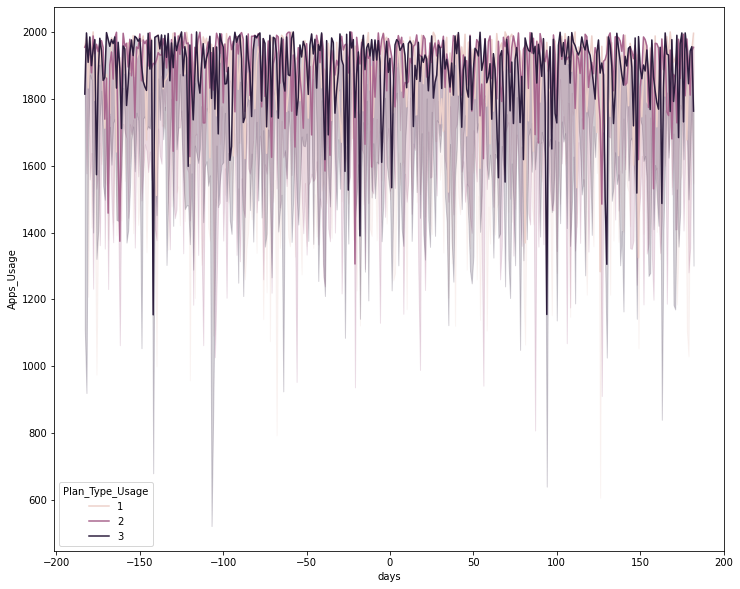

In [226]:
plt.figure(figsize=(12,10))
sns.lineplot(x='days',y='Apps_Usage',hue='Plan_Type_Usage',data=df[['Plan_Type_Usage','days','Apps_Usage']],estimator='max',ci=95)

<AxesSubplot:xlabel='days', ylabel='Minutes'>

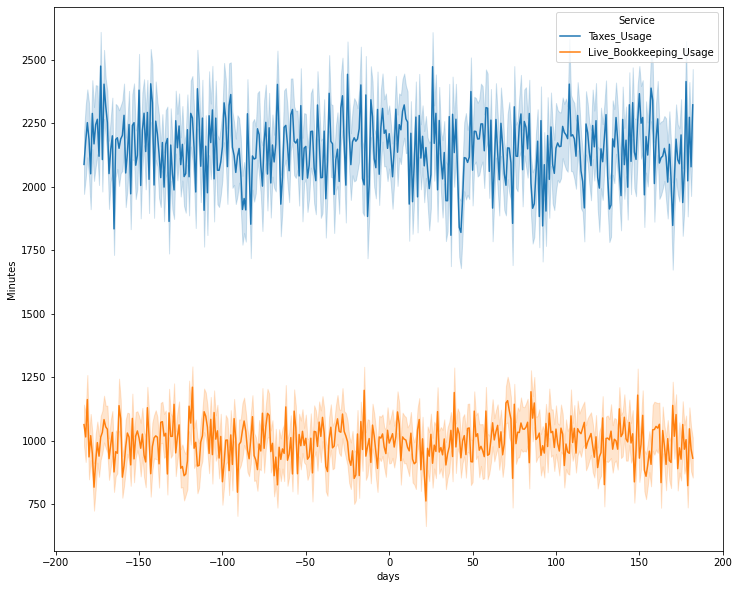

In [228]:
plt.figure(figsize=(12,10))
sns.lineplot(x='days',y='Minutes',hue='Service',data=dfm,estimator='mean',ci=75)

<AxesSubplot:xlabel='days', ylabel='Minutes'>

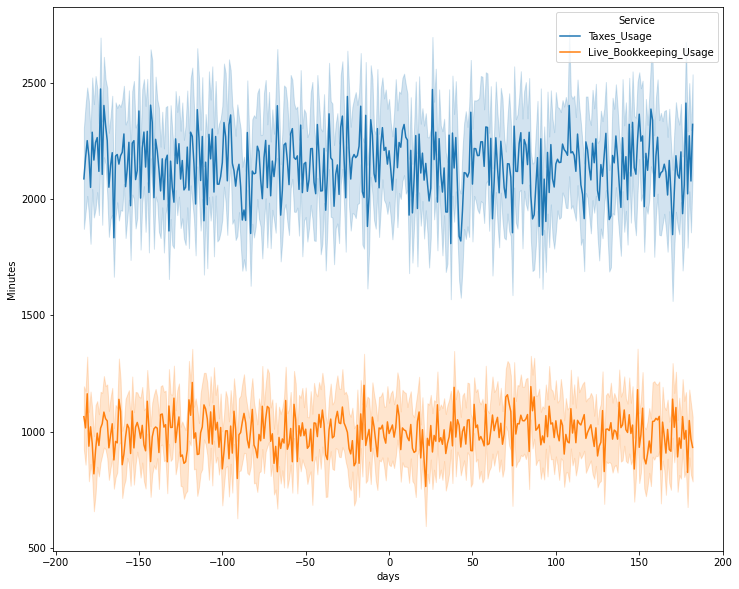

In [217]:
plt.figure(figsize=(12,10))
sns.lineplot(x='days',y='Minutes',hue='Service',data=dfm,estimator='mean',ci=95)

In [56]:
df.columns

Index(['Sign_Up_Date', 'User_ID', 'Transactions', 'Expenses', 'Sales',
       'Cash Flow', 'Payroll', 'Time', 'Reports', 'Taxes', 'Mileage',
       'Accounting', 'My_Accountant', 'Apps', 'Live_Bookkeeping',
       'Transactions_Usage', 'Expenses_Usage', 'Sales_Usage', 'CashFlow_Usage',
       'Payroll_Usage', 'Time_Usage', 'Reports_Usage', 'Taxes_Usage',
       'Mileage_Usage', 'Accounting_Usage', 'My_Accountant_Usage',
       'Apps_Usage', 'Live_Bookkeeping_Usage', 'Plan_Type_Usage',
       'Session_Length', 'Susbcribed', 'days'],
      dtype='object')

In [144]:
df_0 = df.groupby(['days','Plan_Type_Usage']).agg(avg=('Transactions_Usage',np.mean)).reset_index()

In [145]:
df_0.head()

,days,Plan_Type_Usage,avg
0,-183,1,989.538462
1,-183,2,1053.400000
2,-183,3,1255.500000
3,-182,1,961.714286
4,-182,2,1103.117647


In [146]:
df_1 =  df.pivot_table(index='days',columns='Plan_Type_Usage', values='Transactions_Usage', aggfunc='sum').reset_index()

In [147]:
df_1.columns

Index(['days', 1, 2, 3], dtype='object', name='Plan_Type_Usage')

In [38]:
import matplotlib.pyplot as plt

In [258]:
from numpy import random as rm

In [259]:
rm.choice([1.1,1.3,1.6])


1.1

In [261]:
df['Accounting_Usage'] = np.where(df['Susbcribed']==1,df['Accounting_Usage']*1.2,df['Accounting_Usage']*.8)
df['Accounting_Usage'] = np.where(df['Plan_Type_Usage']==1,df['Accounting_Usage']*rm.choice([1.1,1.3,1.6]),df['Accounting_Usage'])

In [35]:
df=pd.read_csv('intuit_dummy.csv')

In [36]:
%matplotlib inline

Text(0.5, 0, 'Days from Sign Up')

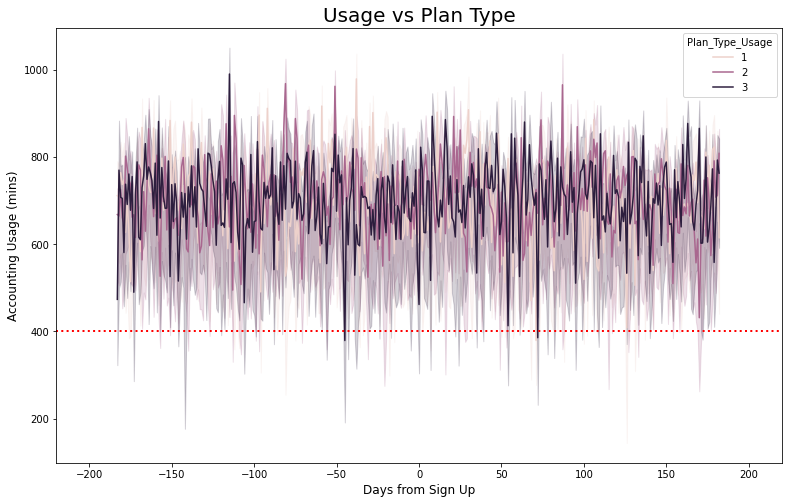

In [242]:
plt.figure(figsize=(13,8))
sns.lineplot(x='days',y='Accounting_Usage',hue='Plan_Type_Usage', ci=90, data=df, estimator=np.std)
plt.axline(xy1=(-200,400),xy2=(200,400),linewidth=2,color='r',linestyle=':')
plt.title(label="Usage vs Plan Type", fontsize=20,loc="center")
plt.ylabel('Accounting Usage (mins)', fontsize=12)
plt.xlabel('Days from Sign Up', fontsize=12)

Cat plot

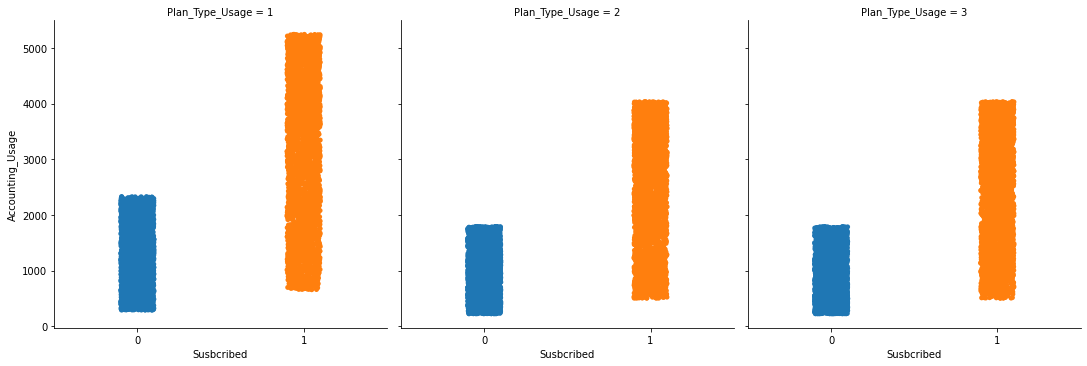

In [262]:
sns.catplot(y='Accounting_Usage', x='Susbcribed',col='Plan_Type_Usage',data=df)

<AxesSubplot:xlabel='Plan_Type_Usage', ylabel='Accounting_Usage'>

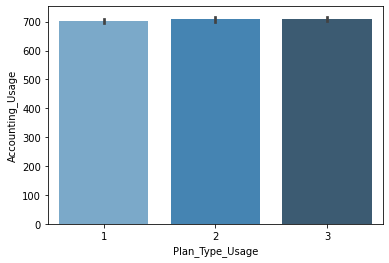

In [245]:
sns.barplot(y='Accounting_Usage', x='Plan_Type_Usage', data=df, estimator=np.std, ci=95,saturation=0.8, palette='Blues_d')

In [25]:
df.columns

Index(['Sign_Up_Date', 'User_ID', 'Transactions', 'Expenses', 'Sales',
       'Cash Flow', 'Payroll', 'Time', 'Reports', 'Taxes', 'Mileage',
       'Accounting', 'My_Accountant', 'Apps', 'Live_Bookkeeping',
       'Transactions_Usage', 'Expenses_Usage', 'Sales_Usage', 'CashFlow_Usage',
       'Payroll_Usage', 'Time_Usage', 'Reports_Usage', 'Taxes_Usage',
       'Mileage_Usage', 'Accounting_Usage', 'My_Accountant_Usage',
       'Apps_Usage', 'Live_Bookkeeping_Usage', 'Plan_Type_Usage',
       'Session_Length', 'Susbcribed', 'days'],
      dtype='object')

In [7]:
sys.executable

'/usr/local/anaconda3/envs/venv/bin/python'